In [1]:
# Import package and module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

from plotly.subplots import make_subplots
import plotly.graph_objects as go

from tqdm import tqdm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('C:/Users/valen02/OneDrive - FrieslandCampina/Documents/Project/Data/MTI_ID.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cust_Code                   2744 non-null   object 
 1   Cust_Name                   2744 non-null   object 
 2   Key_Acc                     2744 non-null   object 
 3   Region                      2744 non-null   object 
 4   Gross_Sales                 2744 non-null   int64  
 5   Mean_Gross_Sales            2744 non-null   float64
 6   Max_Gross_Sales             2744 non-null   int64  
 7   Min_Gross_Sales             2744 non-null   int64  
 8   STD_Gross_Sales             2744 non-null   float64
 9   std_to_mean                 2744 non-null   float64
 10  contri                      2744 non-null   float64
 11  Freq                        2744 non-null   int64  
 12  sku_trx                     2744 non-null   float64
 13  SPM                         2744 

In [4]:
num_feat = [
    'Mean_Gross_Sales', 'STD_Gross_Sales',
    'std_to_mean', 'Freq', 'sku_trx',
    'pctg_SCM_BIG_CAN','pctg_SCM_BIG_POUCH','pctg_SCM_CAN',
    'pctg_SCM_SACHET','pctg_SCM_SMALL_POUCH', 'pctg_Flavor',
    'pctg_Gold','pctg_Plain', 'SPM','MM','Ratio_Festive','growth',
#   'pctg_SCM_MUT-MUT', 
#    'STD_Gross_Sales','Mean_Gross_Sales',
#    'Max_Gross_Sales','Min_Gross_Sales','contri','pctg SCM BIG CAN BKM', 'pctg SCM BIG CAN CHOCO','pctg SCM BIG CAN GOLD',
#    'pctg SCM BIG POUCH BKM','pctgSCM BIG POUCH Choco','pctg SCM CAN BKM',
#    'pctg SCM CAN Choco','pctg SCM CAN COCOPANDAN','pctg SCM CAN Gold','pctg SCM MUT-MUT CHOCOLATE',
#    'pctg SCM MUT-MUT VANILLA','pctg SCM SACHET BKM','pctg SCM SACHET Choco','pctg SCM SACHET GINGER',
#    'pctg SCM SACHET GOLD','pctg SCM SMALL POUCH BKM','pctg SCM SMALL POUCH Choco','pctg SCM SMALL POUCH Gold'
    ]

num_feats = [
    'STD_Gross_Sales','std_to_mean', 'Freq', 'sku_trx',
    'pctg_SCM_BIG_CAN','pctg_SCM_BIG_POUCH','pctg_SCM_CAN',
    'pctg_SCM_SACHET','pctg_SCM_SMALL_POUCH', 'pctg_Flavor',
    'pctg_Gold','pctg_Plain', 'SPM','MM','Ratio_Festive','growth'
#    'Mean_Gross_Sales', 'pctg_SCM_MUT-MUT',
#    'Max_Gross_Sales','Min_Gross_Sales','contri','pctg SCM BIG CAN BKM', 'pctg SCM BIG CAN CHOCO','pctg SCM BIG CAN GOLD',
#    'pctg SCM BIG POUCH BKM','pctgSCM BIG POUCH Choco','pctg SCM CAN BKM',
#    'pctg SCM CAN Choco','pctg SCM CAN COCOPANDAN','pctg SCM CAN Gold','pctg SCM MUT-MUT CHOCOLATE',
#    'pctg SCM MUT-MUT VANILLA','pctg SCM SACHET BKM','pctg SCM SACHET Choco','pctg SCM SACHET GINGER',
#    'pctg SCM SACHET GOLD','pctg SCM SMALL POUCH BKM','pctg SCM SMALL POUCH Choco','pctg SCM SMALL POUCH Gold'
    ]

#cat_feats = ['C_Customer_Code','C_Customer_Name','C_Key_Acct_Grp_Desc','C_Region_Desc']
#for cf in cat_feats:
#    df_iqr2['{}_INT'.format(cf)] = LabelEncoder().fit_transform(df_feat[cf])

In [5]:
from sklearn.metrics import r2_score
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [6]:
#! pip install catboost
import catboost as catboost
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

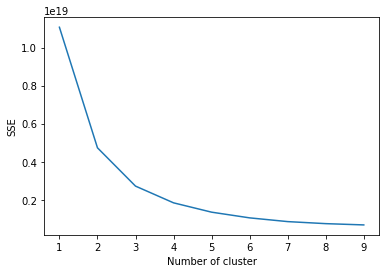

In [7]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df[num_feat])
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [8]:
def clustering(df):
    pca0 = PCA(n_components=2).fit_transform(df[num_feat])
    df['pca01'] = [r[0] for r in pca0]
    df['pca02'] = [r[1] for r in pca0]
    model = KMeans(n_clusters=4, random_state=101)
    model.fit(df[num_feat])
    cluster_center = model.cluster_centers_
    centroids = pd.DataFrame(cluster_center, columns=num_feat)
    centroids = centroids.head(len(num_feat))
    df['cluster'] = model.labels_ + 1
    df['cluster'] = df['cluster'].astype(str)
    
    return centroids, df, model

In [9]:
pca0 = PCA(n_components=2).fit_transform(df[num_feat])
df['pca01'] = [r[0] for r in pca0]
df['pca02'] = [r[1] for r in pca0]
model = KMeans(n_clusters=4, random_state=101)
model.fit(df[num_feat])
cluster_center = model.cluster_centers_
centroids = pd.DataFrame(cluster_center, columns=num_feat)
centroids = centroids.head(len(num_feat))
df['cluster'] = model.labels_ + 1
df['cluster'] = df['cluster'].astype(str)

In [10]:
df_centroids = pd.DataFrame()
df0 = pd.DataFrame()
for i in df['Key_Acc'].unique():
#     df_temp = df.query('REGION_DESC == @i')
    df_temp = df[(df['cluster'].isin(['1','2','3','4']))].query('Key_Acc == @i')
    
    df_c_temp, df_cl_reg_temp, model = clustering(df_temp)
    
    df_cl_reg_temp['Key_Acc'] = i
    df_c_temp['Key_Acc'] = i
    
    df_centroids = pd.concat([df_centroids, df_c_temp])
    df0 = pd.concat([df0, df_cl_reg_temp])

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df[num_feats], df['Gross_Sales'], random_state=42)
CBR_df = CatBoostRegressor(random_state=101)
CBR_df.fit(Xtrain, np.log10(ytrain), verbose=False)
print('smape', 100-smape(ytest,10**CBR_df.predict(Xtest[num_feats])))
print('r2', r2_score(ytest, 10**CBR_df.predict(Xtest[num_feats])))

#df_clust = df['cluster']
#df_num_feat = df[num_feat]
#print('DB Score: ',davies_bouldin_score(df_num_feat,df_clust))
#print('Consistency: ', silhouette_score(df_num_feat,df_clust)*100)

smape 91.39438429056283
r2 0.8691822581142625


In [12]:
smp_reg = {}
r2_reg = {}
sil_reg = {}
for i in tqdm(df['Key_Acc'].unique()):
    df_tmp = df.query('Key_Acc == @i')
    Xtrain, Xtest, ytrain, ytest = train_test_split(df_tmp[num_feats], df_tmp['Gross_Sales'], random_state=42)
    model_df = CatBoostRegressor(random_state=101)
    model_df.fit(Xtrain, np.log10(ytrain), verbose=False)
    smp_reg[i] = 100-smape(ytest,10**model_df.predict(Xtest[num_feats]))
    r2_reg[i] = r2_score(ytest, 10**model_df.predict(Xtest[num_feats]))
#    sil_reg[i] = silhouette_score(df_num_feat,df_clust)*100
    
print(np.mean(list(smp_reg.values())))
dx = pd.DataFrame()
dx['Key_Acc'] = smp_reg.keys()
dx['accuracy'] = smp_reg.values()
dx['r2'] = dx['Key_Acc'].map(r2_reg)
#dx['Consistency'] = dx['C_Region_Desc'].map(sil_reg)
dx.sort_values('Key_Acc')

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.21s/it]

88.65191798249737


,Key_Acc,accuracy,r2
1,H3 Loc Prox Self Service MM-MTI,89.041189,0.964579
0,H3 Local Supermarket MTI SPM,88.262647,0.788563


In [13]:
rows = []
for i in range(len(num_feats)):
    rows.append((num_feats[i], CBR_df.feature_importances_[i]))
rows = pd.DataFrame(rows, columns=['feats', 'importance'])
rows.sort_values(by='importance', ascending=False)

,feats,importance
0,STD_Gross_Sales,69.625933
1,std_to_mean,9.085807
2,Freq,8.643423
3,sku_trx,4.188430
15,growth,3.033651
14,Ratio_Festive,1.592433
9,pctg_Flavor,0.652211
12,SPM,0.483026
10,pctg_Gold,0.475015
4,pctg_SCM_BIG_CAN,0.458321


In [14]:
# Filtered Data

df_centroids = pd.DataFrame()
df1 = pd.DataFrame()

for i in df['Key_Acc'].unique():

    df_temp = df[(df['cluster'].isin(['1','2','3']))].query('Key_Acc == @i')
    df_c_temp, df_cl_reg_temp, model = clustering(df_temp)
    
    df_cl_reg_temp['Key_Acc'] = i
    df_c_temp['Key_Acc'] = i
    
    df_centroids = pd.concat([df_centroids, df_c_temp])
    df1 = pd.concat([df1, df_cl_reg_temp])

In [15]:
print(df1['Gross_Sales'].sum()/df['Gross_Sales'].sum())
print(df1.shape)

0.8896199664619765
(2733, 76)


In [17]:
print(df1['growth'].describe())
px.box(df1, x='Key_Acc', y="growth",hover_data=['Cust_Name','Region']).update_layout(height=500, width=1000)

count    2733.000000
mean       18.203393
std        56.930070
min       -16.068063
25%        -0.180106
50%         0.064815
75%         0.457955
max       200.000000
Name: growth, dtype: float64


In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df1[num_feats], df1['Gross_Sales'], random_state=42)
CBR_df1 = CatBoostRegressor(random_state=101)
CBR_df1.fit(Xtrain, np.log10(ytrain), verbose=False)
print('smape', 100-smape(ytest,10**CBR_df1.predict(Xtest[num_feats])))
print('r2', r2_score(ytest, 10**CBR_df1.predict(Xtest[num_feats])))

#df_clust = df1['cluster']
#df_num_feat = df1[num_feat]
#print('DB Score: ',davies_bouldin_score(df_num_feat,df_clust))
#print('Consistency: ', silhouette_score(df_num_feat,df_clust)*100)

smape 90.32861452150505
r2 0.9691132166903806


In [17]:
smp_reg = {}
r2_reg = {}
sil_reg = {}
for i in tqdm(df1['Key_Acc'].unique()):
    df_tmp = df1.query('Key_Acc == @i')
    Xtrain, Xtest, ytrain, ytest = train_test_split(df_tmp[num_feats], df_tmp['Gross_Sales'], random_state=42)
    model_df1 = CatBoostRegressor(random_state=101)
    model_df1.fit(Xtrain, np.log10(ytrain), verbose=False)
    smp_reg[i] = 100-smape(ytest,10**model_df1.predict(Xtest[num_feats]))
    r2_reg[i] = r2_score(ytest, 10**model_df1.predict(Xtest[num_feats]))
#    sil_reg[i] = silhouette_score(df_num_feat,df_clust)*100
    
print(np.mean(list(smp_reg.values())))
dx = pd.DataFrame()
dx['Key_Acc'] = smp_reg.keys()
dx['accuracy'] = smp_reg.values()
#dx['r2'] = dx['C_Region_Desc'].map(r2_reg)
#dx['Consistency'] = dx['C_Region_Desc'].map(sil_reg)
dx.sort_values('Key_Acc')

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.67s/it]

88.21803627251411


,Key_Acc,accuracy
1,H3 Loc Prox Self Service MM-MTI,89.041189
0,H3 Local Supermarket MTI SPM,87.394884


In [20]:
rows = []
for i in range(len(num_feats)):
    rows.append((num_feats[i], CBR_df1.feature_importances_[i]))
rows = pd.DataFrame(rows, columns=['feats', 'importance'])
rows.sort_values(by='importance', ascending=False)

,feats,importance
0,STD_Gross_Sales,69.112552
1,std_to_mean,8.908686
2,Freq,8.093589
3,sku_trx,4.091651
15,growth,3.008947
14,Ratio_Festive,2.207996
4,pctg_SCM_BIG_CAN,0.740882
11,pctg_Plain,0.594832
12,SPM,0.581144
13,MM,0.517866


In [18]:
df2_temp = pd.DataFrame()
df2 = pd.DataFrame()
df_centroids = pd.DataFrame()
for i in df1['Key_Acc'].unique():
    
    dx = df1.groupby(['Key_Acc', 'cluster'], as_index=False).agg({'Cust_Code':'nunique'})
    xyz = dx.query('Key_Acc == @i')
    cl_max = xyz[xyz['Cust_Code'] == xyz['Cust_Code'].max()]['cluster'].values[0]
    cl_min = xyz[xyz['Cust_Code'] == xyz['Cust_Code'].min()]['cluster'].values[0]
    
#     print(i, cl_max, xyz.Customer_Code.max())
    
    df_iqr_tmp = df1.query('Key_Acc == @i').query('cluster == @cl_max')

    
#     print(df_iqr_tmp.shape)
    df_iqr_tmp2 = df1[~df1['Cust_Code'].isin(df_iqr_tmp['Cust_Code'].unique())].query('Key_Acc == @i')
    df_iqr_tmp3 = df_iqr_tmp2.query('Key_Acc == @i').query('cluster == @cl_min')
    df_iqr_tmp4 = df_iqr_tmp2[~df_iqr_tmp2['Cust_Code'].isin(df_iqr_tmp3['Cust_Code'].unique())].query('Key_Acc == @i')
    
    feat1 = df_iqr_tmp['STD_Gross_Sales'].describe()
    feat2 = df_iqr_tmp['std_to_mean'].describe()
    feat3 = df_iqr_tmp['Gross_Sales'].describe()
    feat4 = df_iqr_tmp3['Gross_Sales'].describe()
#    feat4 = df_iqr_tmp['gross_amountsum'].describe()['mean']
    
    IQR_1 = feat1['75%'] - feat1['25%']
    IQR_2 = feat2['75%'] - feat2['25%']
    IQR_3 = feat3['75%'] - feat3['25%']
    IQR_4 = feat4['75%'] - feat4['25%']
    
    IQR_std_min = feat1['25%'] - 1.5*IQR_1
    IQR_stm_min = feat2['25%'] - 1.5*IQR_2
    IQR_gs_min = feat3['25%'] - 0*IQR_3
    
    IQR_std_max = feat1['75%'] + 1.5*IQR_1
    IQR_stm_max = feat2['75%'] + 1.5*IQR_2
    IQR_gs_max = feat4['75%'] + 0*IQR_4
    
    print(i)
    print(IQR_gs_min, IQR_gs_max)
#    print(IQR_stm_min, IQR_stm_max)
#    print(IQR_std_min, IQR_1, IQR_std_max)
#   print(IQR_stm_min, IQR_2, IQR_stm_max)
    
    df_iqr_tmp1 = df_iqr_tmp.query('Gross_Sales >= @IQR_gs_min')# & (df_iqr_tmp['Gross_Sales']<=IQR_gs_max))]
    df_iqr_tmp5 = df_iqr_tmp3.query('Gross_Sales <= @IQR_gs_max')
#    df_iqr_tmp1 = df_iqr_tmp[((df_iqr_tmp['STD_Gross_Sales']>=IQR_std_min) & (df_iqr_tmp['STD_Gross_Sales']<=IQR_std_max)) 
#                & ((df_iqr_tmp['std_to_mean']>=IQR_stm_min) & (df_iqr_tmp['std_to_mean']<=IQR_stm_max))]
#     df_iqr_tmp1 = df_iqr_tmp1[((df_iqr_tmp1['gross_amountsum']>=IQR_gam_min) & (df_iqr_tmp1['gross_amountsum']<=IQR_gam_max))]
    
#     df_iqr_tmp1 = df_iqr_tmp1[(df_iqr_tmp1['parent_sku_desc']>=IQR_psd_min) & (df_iqr_tmp1['parent_sku_desc']<=IQR_psd_max)]
#     print(df_iqr_tmp1.shape)
        
    df2_temp = pd.concat([df2_temp, df_iqr_tmp1, df_iqr_tmp4, df_iqr_tmp5])
    
    df_temp = df2_temp.query('Key_Acc == @i')
    df_c_temp, df_cl_reg_temp, model = clustering(df_temp)
    
    df_cl_reg_temp['Key_Acc'] = i
    df_c_temp['Key_Acc'] = i
    
    df_centroids = pd.concat([df_centroids, df_c_temp])
    df2 = pd.concat([df2, df_cl_reg_temp])

H3 Local Supermarket MTI SPM
36621573.5 7082169212.5
H3 Loc Prox Self Service MM-MTI
24948563.5 5658255900.5


In [19]:
print(df1.shape)
print(df2.shape)
print(df2['Gross_Sales'].sum()/df['Gross_Sales'].sum())

(2733, 76)
(2178, 76)
0.8304164965481952


In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df2[num_feats], df2['Gross_Sales'], random_state=42)
CBR_df2 = CatBoostRegressor(random_state=101)
CBR_df2.fit(Xtrain, np.log10(ytrain), verbose=False)
print('smape', 100-smape(ytest,10**CBR_df2.predict(Xtest[num_feats])))
print('r2', r2_score(ytest, 10**CBR_df2.predict(Xtest[num_feats])))

#df_clust = df3['cluster']
#df_num_feat = df3[num_feat]
#print('DB Score: ',davies_bouldin_score(df_num_feat,df_clust))
#print('Consistency: ', silhouette_score(df_num_feat,df_clust)*100)

smape 92.23608158985591
r2 0.9491307825309547


In [21]:
smp_reg = {}
r2_reg = {}
sil_reg = {}
for i in tqdm(df2['Key_Acc'].unique()):
    df_tmp = df2.query('Key_Acc == @i')
    Xtrain, Xtest, ytrain, ytest = train_test_split(df_tmp[num_feats], df_tmp['Gross_Sales'], random_state=42)
    model_df2 = CatBoostRegressor(random_state=101)
    model_df2.fit(Xtrain, np.log10(ytrain), verbose=False)
    smp_reg[i] = 100-smape(ytest,10**model_df2.predict(Xtest[num_feats]))
    r2_reg[i] = r2_score(ytest, 10**model_df2.predict(Xtest[num_feats]))
#    sil_reg[i] = silhouette_score(df_num_feat,df_clust)*100
    
print(np.mean(list(smp_reg.values())))
dx = pd.DataFrame()
dx['Key_Acc'] = smp_reg.keys()
dx['accuracy'] = smp_reg.values()
#dx['r2'] = dx['C_Region_Desc'].map(r2_reg)
#dx['Consistency'] = dx['C_Region_Desc'].map(sil_reg)
dx.sort_values('Key_Acc')

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:09<00:00,  4.59s/it]

91.21672009888934


,Key_Acc,accuracy
1,H3 Loc Prox Self Service MM-MTI,91.080274
0,H3 Local Supermarket MTI SPM,91.353166


In [22]:
rows = []
for i in range(len(num_feats)):
    rows.append((num_feats[i], CBR_df2.feature_importances_[i]))
rows = pd.DataFrame(rows, columns=['feats', 'importance'])
rows.sort_values(by='importance', ascending=False)

,feats,importance
0,STD_Gross_Sales,69.560012
1,std_to_mean,12.662215
3,sku_trx,4.766495
2,Freq,4.245271
15,growth,2.688171
13,MM,1.156211
14,Ratio_Festive,1.143583
12,SPM,0.912455
7,pctg_SCM_SACHET,0.633180
11,pctg_Plain,0.597556


In [30]:
df2.groupby('Key_Acc').describe()

Gross_Sales                              \
                                      count          mean           std   
Key_Acc                                                                   
H3 Loc Prox Self Service MM-MTI      1005.0  1.902713e+08  2.541654e+08   
H3 Local Supermarket MTI SPM         1173.0  7.939877e+08  1.103617e+09   

                                                                       \
                                        min          25%          50%   
Key_Acc                                                                 
H3 Loc Prox Self Service MM-MTI  24958556.0   54992029.0  103800489.0   
H3 Local Supermarket MTI SPM     36654503.0  134674332.0  377810243.0   

                                                           Mean_Gross_Sales  \
                                         75%           max            count   
Key_Acc                                                                       
H3 Loc Prox Self Service MM-MTI  219790976.0  2.981204e+09           1005.0   
H3 Local Supermarket MTI SPM     959602786.0  7.072865e+09           1173.0   

                                                                          \
                                         mean           std          min   
Key_Acc                                                                    
H3 Loc Prox Self Service MM-MTI  9.193456e+06  1.298798e+07  1055160.542   
H3 Local Supermarket MTI SPM     3.476319e+07  4.758893e+07  1528920.625   

                                                                        \
                                         25%          50%          75%   
Key_Acc                                                                  
H3 Loc Prox Self Service MM-MTI  2622549.250   4793756.50  10055088.87   
H3 Local Supermarket MTI SPM     6249007.333  16619188.83  40902729.58   

                                             Max_Gross_Sales                \
                                         max           count          mean   
Key_Acc                                                                      
H3 Loc Prox Self Service MM-MTI  127862651.7          1005.0  3.506014e+07   
H3 Local Supermarket MTI SPM     307515860.4          1173.0  9.890950e+07   

                                                                      \
                                          std        min         25%   
Key_Acc                                                                
H3 Loc Prox Self Service MM-MTI  6.889189e+07  1707954.0   7363748.0   
H3 Local Supermarket MTI SPM     1.367397e+08  3169252.0  16191618.0   

                                                                        \
                                        50%          75%           max   
Key_Acc                                                                  
H3 Loc Prox Self Service MM-MTI  14019773.0   34516063.0  9.234838e+08   
H3 Local Supermarket MTI SPM     49608716.0  116161086.0  1.408838e+09   

                                Min_Gross_Sales                              \
                                          count          mean           std   
Key_Acc                                                                       
H3 Loc Prox Self Service MM-MTI          1005.0  1.092835e+06  3.872000e+06   
H3 Local Supermarket MTI SPM             1173.0  6.502588e+06  1.558803e+07   

                                                                             \
                                        min       25%        50%        75%   
Key_Acc                                                                       
H3 Loc Prox Self Service MM-MTI -40969905.0   38261.0   447913.0  1324984.0   
H3 Local Supermarket MTI SPM    -92179427.0  298274.0  1951084.0  7069118.0   

                                             STD_Gross_Sales                \
                                         max           count          mean   
Key_Acc                                                                

In [32]:
print(df2[{'std_to_mean','Ratio_Festive'}].describe())
px.box(df2, y=['std_to_mean','Ratio_Festive'], facet_col = 'Region', facet_col_wrap=2,
       hover_data=['Key_Acc','Cust_Name','Region', 'Freq','Gross_Sales']).update_layout(height=1000, width=1000)

       Ratio_Festive  std_to_mean
count    2178.000000  2178.000000
mean        0.468618     0.127324
std         0.324472     0.534138
min        -0.007539     0.000000
25%         0.333449     0.039834
50%         0.423258     0.054083
75%         0.526735     0.082691
max         6.961720    14.044990


In [23]:
# Filtered Data

df_centroids1 = pd.DataFrame()
df3 = pd.DataFrame()

for i in df2['Key_Acc'].unique():

    df_temp = df2.query('Key_Acc == @i')
    df_temp = df_temp.query('std_to_mean >= 0')
    
    min_freq = df_temp.query('Key_Acc == @i').Freq.min()
    mean_freq = df_temp.query('Key_Acc == @i').Freq.mean()
    std_freq = df_temp.query('Key_Acc == @i').Freq.describe()['std']
    med_freq = df_temp.query('Key_Acc == @i').Freq.median()
    q1_freq = df_temp.query('Key_Acc == @i').Freq.describe()['25%']
    q3_freq = df_temp.query('Key_Acc == @i').Freq.describe()['75%']
    IQR_freq = q3_freq - q1_freq
    LL_freq = IQR_freq - 0.5*q1_freq
    UCL_freq = mean_freq - 1*std_freq -1
    
    df_temp1 = df_temp.query('Freq >= @UCL_freq')
    print(i, UCL_freq)
    df_c_temp, df_cl_reg_temp, model = clustering(df_temp1)
    
    df_cl_reg_temp['Key_Acc'] = i
    df_c_temp['Key_Acc'] = i
    
    df_centroids1 = pd.concat([df_centroids1, df_c_temp])
    df3 = pd.concat([df3, df_cl_reg_temp])
    
   
#     fig_cluster = px.scatter(x='pca01', y='pca02', data_frame=df_cl_reg_temp, color='cluster_reg', 
#                              title="Region: {}".format(i), hover_data=['Customer_Name', 'gross_amountsum', 'gross_amountcount', 'clusters'])
    
#     fig_cluster.show()

H3 Local Supermarket MTI SPM 18.64721954699684
H3 Loc Prox Self Service MM-MTI 16.85627649343524


In [24]:
print(df3.shape)
print(df3['Gross_Sales'].sum()/df['Gross_Sales'].sum())

(1999, 76)
0.7938358415741771


In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df3[num_feats], df3['Gross_Sales'], random_state=42)
CBR_df3 = CatBoostRegressor(random_state=101)
CBR_df3.fit(Xtrain, np.log10(ytrain), verbose=False)
print('smape', 100-smape(ytest,10**CBR_df3.predict(Xtest[num_feats])))
print('r2', r2_score(ytest, 10**CBR_df3.predict(Xtest[num_feats])))

#df_clust = df3['cluster']
#df_num_feat = df3[num_feat]
#print('DB Score: ',davies_bouldin_score(df_num_feat,df_clust))
#print('Consistency: ', silhouette_score(df_num_feat,df_clust)*100)

smape 93.48638956135548
r2 0.9413318764929193


In [26]:
smp_reg = {}
r2_reg = {}
for i in tqdm(df3['Key_Acc'].unique()):
    df_tmp = df3.query('Key_Acc == @i')
    Xtrain, Xtest, ytrain, ytest = train_test_split(df_tmp[num_feats], df_tmp['Gross_Sales'], random_state=42)
    model = CatBoostRegressor(random_state=101)
    model.fit(Xtrain, np.log10(ytrain), verbose=False)
    smp_reg[i] = 100-smape(ytest,10**model.predict(Xtest[num_feats]))
    r2_reg[i] = r2_score(ytest, 10**model.predict(Xtest[num_feats]))
    
print(np.mean(list(smp_reg.values())))
dx = pd.DataFrame()
dx['Key_Acc'] = smp_reg.keys()
dx['accuracy'] = smp_reg.values()
dx['r2'] = dx['Key_Acc'].map(r2_reg)
dx.sort_values('Key_Acc')

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:08<00:00,  4.32s/it]

91.67095123077773


,Key_Acc,accuracy,r2
1,H3 Loc Prox Self Service MM-MTI,91.263075,0.873858
0,H3 Local Supermarket MTI SPM,92.078827,0.972073


In [27]:
rows = []
for i in range(len(num_feats)):
    rows.append((num_feats[i], CBR_df3.feature_importances_[i]))
rows = pd.DataFrame(rows, columns=['feats', 'importance'])
rows.sort_values(by='importance', ascending=False)

,feats,importance
0,STD_Gross_Sales,74.625360
1,std_to_mean,11.236627
3,sku_trx,4.881687
15,growth,2.784489
12,SPM,1.615478
2,Freq,1.232242
14,Ratio_Festive,0.725593
11,pctg_Plain,0.695393
13,MM,0.437327
8,pctg_SCM_SMALL_POUCH,0.347070


In [40]:
df3_crs = df3.groupby(['Key_Acc','Region', 'cluster'], as_index=False).agg({'Cust_Code':'nunique',
                                                                     'Gross_Sales':['min','median','mean','max','sum','std'],
                                                                     'STD_Gross_Sales':['min','median','mean','max', 'std'],
                                                                        'Freq':['min','median','mean','max'],
                                                                 'std_to_mean':['min', 'median', 'mean','max', 'std'],
                                                                 'sku_trx':['min', 'median', 'mean', 'max', 'std'],
                                                                 'Ratio_Festive':['min','median','mean','max','std'],
                                                                 'growth':['min', 'median','mean','max','std']})

In [41]:
df3_crs = df3_crs.droplevel(0, axis=1)
df3_crs.columns = ['Key_Acc', 'Region','cluster', 'Customer_Code_nunique', 
                 'gross_amountmin', 'gross_amountmed', 'gross_amountmean', 'gross_amountmax', 'gross_amountsum', 'gross_amountstd',
                 'gross_stdmin', 'gross_stdmed', 'gross_stdmean', 'gross_stdmax', 'gross_std_std',
                 'freq_min','freq_med','freq_mean','freq_max',
                  'stm_min', 'stm_med','stm_mean','stm_max', 'stm_std',
                  'sku_min','sku_med','sku_mean','sku_max','sku_std',
                  'rtf_min','rtf_med','rtf_mean','rtf_max','rtf_std',
                  'growth_min','growth_med', 'growth_mean','growth_max','growth_std']

In [42]:
df3_crs[['gross_amountmin', 'gross_amountmed', 'gross_amountmean', 'gross_amountmax']] = df3_crs[['gross_amountmin', 'gross_amountmed', 'gross_amountmean', 'gross_amountmax']]/24
df3_crs = df3_crs.sort_values(['Key_Acc', 'gross_amountmin'])